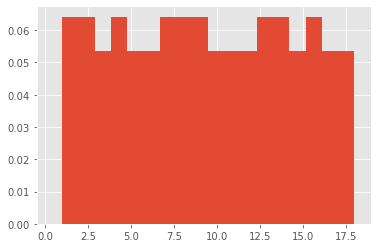

In [25]:
# Seed value
Xo = 1
# Modulus parameter
m = 19
# Multiplier term
a = 2
# Increment term
c = 0
# Number of Random numbers
# to be generated
noOfRandomNums = 100

# To store random numbers
randomNums = [0] * (noOfRandomNums)

# Function Call
linearCongruentialMethod(Xo, m, a, c,
                        randomNums,
                        noOfRandomNums)

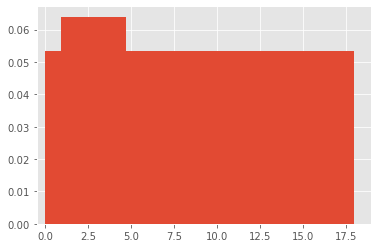

In [26]:
# Seed value
Xo = 1
# Modulus parameter
m = 19
# Multiplier term
a = 1
# Increment term
c = 1
# Number of Random numbers
# to be generated
noOfRandomNums = 100

# To store random numbers
randomNums = [0] * (noOfRandomNums)

# Function Call
linearCongruentialMethod(Xo, m, a, c,
                        randomNums,
                        noOfRandomNums)

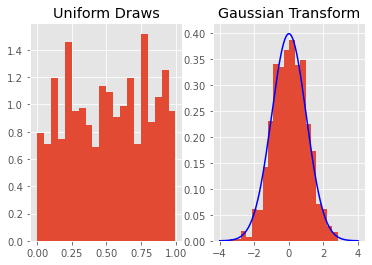

In [27]:
displayUniformTransform(mu=0, scale=1, size=1000)

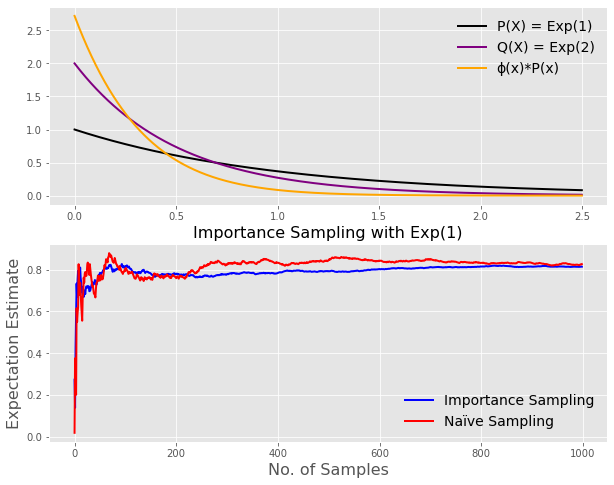

In [11]:
plotImportanceSampling()

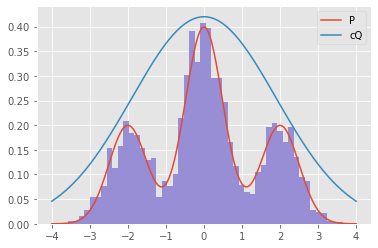

Samples Generated: 5000
Samples Rejected: 2454
Rejection Rate: 0.4908


In [28]:
displayRejectionSampling(size=5000, q_mu=0, q_sigma=1.9, c=2)

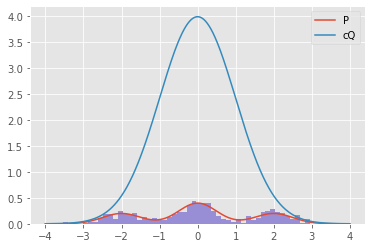

Samples Generated: 5000
Samples Rejected: 4529
Rejection Rate: 0.9058


In [29]:
displayRejectionSampling(size=5000, q_mu=0, q_sigma=1, c=10)

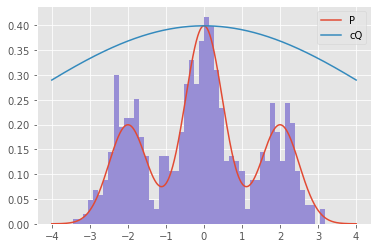

Samples Generated: 4000
Samples Rejected: 3222
Rejection Rate: 0.8055


In [23]:
displayRejectionSampling(size=5000, q_mu=0, q_sigma=5, c=5)

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

%matplotlib inline
import time
import pylab as pl
from IPython import display
from scipy.stats import norm, uniform, expon

In [20]:
def linearCongruentialMethod(Xo, m, a, c,
                            randomNums,
                            noOfRandomNums):

    # Initialize the seed state
    randomNums[0] = Xo
    
    # Traverse to generate required
    # numbers of random numbers
    for i in range(1, noOfRandomNums):

        # Follow the linear congruential method
        randomNums[i] = ((randomNums[i - 1] * a) + c) % m
    
    for idx in range(0, len(randomNums)):
        plt.xlim(-0.5, m)
        if c == 0:
            plt.hist(randomNums[:idx], density=True, align='mid', bins=min(idx+1, m-1))
        else:
            plt.hist(randomNums[:idx], density=True, align='mid', bins=min(idx+1, m))
        display.clear_output(wait=True)
        plt.show()
        time.sleep(0.001)

def displayUniformTransform(mu=0, scale=1, size=1000):
    
    samples_uniform = uniform.rvs(0, 1, size)
    line = np.linspace(-4, 4, 1000)
    actual_gaussian = norm.pdf(line, mu, scale)
    for idx in range(0, size, 10):
        samples_norm = norm.ppf(samples_uniform[:idx])
        fig, (ax_1, ax_2) = plt.subplots(1,2)
        ax_1.hist(samples_uniform[:idx], density=True, align='mid', bins=20)
        ax_1.set_title("Uniform Draws")
        ax_2.hist(samples_norm[:idx], density=True, align='mid', bins=20)
        ax_2.plot(line, actual_gaussian, color="blue")
        ax_2.set_title("Gaussian Transform")
        plt.show()
        display.clear_output(wait=True)
        
def displayRejectionSampling(size=5000, q_mu=0, q_sigma=2, c=3):

    line = np.linspace(-4, 4, 1000)
    pdf_1 = norm.pdf(line, -2, 0.5)
    pdf_2 = norm.pdf(line, 0, 0.5)
    pdf_3 = norm.pdf(line, 0, 0.5)
    pdf_4 = norm.pdf(line, 2, 0.5)
    total_line_pdf = sum(np.array([pdf_1, pdf_2, pdf_3, pdf_4]))/4
    norm_line_pdf = norm.pdf(line, loc=q_mu, scale=q_sigma)*c

    q_samples = norm.rvs(loc=q_mu, scale=q_sigma, size=size)

    norm_pdf = norm.pdf(q_samples, loc=q_mu, scale=q_sigma)*c
    pdf_1 = norm.pdf(q_samples, -2, 0.5)
    pdf_2 = norm.pdf(q_samples, 0, 0.5)
    pdf_3 = norm.pdf(q_samples, 0, 0.5)
    pdf_4 = norm.pdf(q_samples, 2, 0.5)
    total_pdf = sum(np.array([pdf_1, pdf_2, pdf_3, pdf_4]))/4

    probs = norm.pdf(q_samples, loc=q_mu, scale=q_sigma)*c
    sample_uniform = [uniform.rvs(0, probs[idx], 1)[0] for idx in range(0, size)]
    save = []
    for idx in range(0, size+50, 50):
        save = np.where(sample_uniform[:idx] < total_pdf[:idx], q_samples[:idx], np.nan)
        if len(save[~np.isnan(save)]) == 0:
            continue
        plt.plot(line, total_line_pdf, label="P")
        plt.plot(line, norm_line_pdf, label="cQ")
        plt.legend()
        plt.hist(save, density=True, align='mid', bins=50)
        plt.show()
        display.clear_output(wait=True)
    
    plt.plot(line, total_line_pdf, label="P")
    plt.plot(line, norm_line_pdf, label="cQ")
    plt.legend()
    plt.hist(save, density=True, align='mid', bins=50)
    plt.show()
    
    print("Samples Generated: {}".format(size))
    print("Samples Rejected: {}".format(size - len(save[~np.isnan(save)])))
    print("Rejection Rate: {}".format((size - len(save[~np.isnan(save)]))/idx))

#function in the expected value
def h(x):
    value = np.exp(- 2*x + np.cos(x)) 
    return(value)

#proposal function which we have access to Exp(2)
def exp_pdf(x, rate = 1):
    value = rate * np.exp(- rate * x)
    return(value)

def plotImportanceSampling():
    x_values = np.arange(0,2.5,0.001)
    y_proposal = np.array(expon.pdf(x_values, scale = 1))
    y_target = np.array(expon.pdf(x_values, scale = 0.5))
    y_h = np.array(h(x_values)*expon.pdf(x_values, scale = 1))

    size = 1000
    # generate the random samples from both 
    naive = expon.rvs(scale = 1,  size = size)
    smart = expon.rvs(scale = 0.5,  size = size)

    # evaluate the function at these points
    naive_evals = h(naive)
    smart_evals = h(smart)
    numerator = exp_pdf(smart, 1)
    denominator = exp_pdf(smart, 2)

    # find our estimate of the expectation of h over time 
    importance = []
    not_importance = []

    for idx in range(1, size):
        weighting = numerator[:idx] / denominator[:idx]
        importance_sample = np.mean(np.multiply(weighting, smart_evals[:idx]))
        importance.append(importance_sample)
        naive_estimate = np.mean(naive_evals[:idx])
        not_importance.append(naive_estimate)
        fig, (ax_1, ax_2) = plt.subplots(2,1, figsize=(10, 8))
        ax_1.plot(x_values, y_proposal, color ='black',linewidth = 2,label = 'P(X) = Exp(1)')
        ax_1.plot(x_values, y_target, color ='purple',linewidth = 2,label = 'Q(X) = Exp(2)')
        ax_1.plot(x_values, y_h, color ='orange',linewidth = 2,label = 'ϕ(x)*P(x)')
        ax_1.legend(frameon = False, fontsize = 14)
        ax_2.plot(range(idx), importance, color='blue', linewidth=2, label = 'Importance Sampling')
        ax_2.plot(range(idx), not_importance, color='red', linewidth=2, label = 'Naïve Sampling')
        ax_2.legend(frameon = False, fontsize = 14)
        ax_2.set_title("Importance Sampling with Exp(1)", fontsize = 16)
        ax_2.set_xlabel("No. of Samples", fontsize = 16)
        ax_2.set_ylabel("Expectation Estimate", fontsize = 16)
        plt.show()
        display.clear_output(wait=True)